In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [20]:
#1. Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import sklearn.datasets as skdatasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.linear_model import Ridge, Lasso

In [21]:
#2. Load the csv data
file_path = "/content/gdrive/MyDrive/Colab Notebooks/garments_worker_productivity.csv"
data = pd.read_csv(file_path)
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [22]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [23]:
print(data.describe())

              team  targeted_productivity          smv           wip  \
count  1197.000000            1197.000000  1197.000000    691.000000   
mean      6.426901               0.729632    15.062172   1190.465991   
std       3.463963               0.097891    10.943219   1837.455001   
min       1.000000               0.070000     2.900000      7.000000   
25%       3.000000               0.700000     3.940000    774.500000   
50%       6.000000               0.750000    15.260000   1039.000000   
75%       9.000000               0.800000    24.260000   1252.500000   
max      12.000000               0.800000    54.560000  23122.000000   

          over_time    incentive    idle_time     idle_men  \
count   1197.000000  1197.000000  1197.000000  1197.000000   
mean    4567.460317    38.210526     0.730159     0.369256   
std     3348.823563   160.182643    12.709757     3.268987   
min        0.000000     0.000000     0.000000     0.000000   
25%     1440.000000     0.000000     0.00

In [24]:
#Display the category in each column
print("Quater : ", data['quarter'].unique())
print("Day : ", data['day'].unique())
print("Department : ", data['department'].unique())

Quater :  ['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']
Day :  ['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']
Department :  ['sweing' 'finishing']


In [25]:
#Convert the columns into numeric 
data.replace({'department':{'sweing':0,'finishing':1}, 'day':{'Monday':1 ,'Tuesday':2 ,'Wednesday':3 ,'Thursday': 4 ,'Saturday':5 ,'Sunday': 6 }, 'quarter':{'Quarter1':1, 'Quarter2': 2, 'Quarter3':3, 'Quarter4':4, 'Quarter5':5}}, inplace=True)
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,1,0,4,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,1,1,4,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,1,0,4,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,1,0,4,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,1,0,4,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [26]:
# Remove unwanted column
data.drop(['date'], axis=1, inplace= True)

In [27]:
# Inspect for missing values
print(data.isna().sum())

quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64


In [29]:
#Inpute missing values

imputer = SimpleImputer( strategy='constant', fill_value=0)
data['wip'] = pd.Series(imputer.fit_transform(np.array(data['wip']).reshape(1, -1)).reshape(-1))

In [31]:
#convert the new column data into categorical

data[['quarter', 'department', 'day', 'team']] = data[['quarter', 'department', 'day', 'team']].apply(lambda x: x.astype("category"))

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   quarter                1197 non-null   category
 1   department             1197 non-null   category
 2   day                    1197 non-null   category
 3   team                   1197 non-null   category
 4   targeted_productivity  1197 non-null   float64 
 5   smv                    1197 non-null   float64 
 6   wip                    1197 non-null   float64 
 7   over_time              1197 non-null   int64   
 8   incentive              1197 non-null   int64   
 9   idle_time              1197 non-null   float64 
 10  idle_men               1197 non-null   int64   
 11  no_of_style_change     1197 non-null   int64   
 12  no_of_workers          1197 non-null   float64 
 13  actual_productivity    1197 non-null   float64 
dtypes: category(4), float64(6), int64(4)
mem

In [32]:
#Split the data into features and labels
features = data.drop('actual_productivity', axis=1)
labels = data.actual_productivity

In [33]:
##Perform a train test split to obtain training and testing dataset
SEED = 12345
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=SEED)

In [34]:
#Data Normalization
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
standardizer.fit(X_train)
X_train = standardizer.transform(X_train)
X_test = standardizer.transform(X_test)

In [35]:
#Start with input layer
nIn = X_train.shape[1]
inputs = keras.Input(shape=(nIn,))
h1 = layers.Dense(128, activation='elu')
h2 = layers.Dense(64, activation='elu')
h3 = layers.Dense(32, activation='elu')
out_layer = layers.Dense(1)

#Use Functional API to link layers together
x = h1(inputs)
x = h2(x)
x = h3(x)
outputs = out_layer(x)

#Create a model by using the model object
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12,161
Trainable params: 12,161
Non-trainable params: 0
_________________________________________________________________


In [36]:
#Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [37]:
#Model Training
BATCH_SIZE = 32
EPOCHS = 30

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/30
30/30 [==============================] - 1s 9ms/step - loss: 0.1653 - mae: 0.2904 - val_loss: 0.0451 - val_mae: 0.1526
Epoch 2/30
30/30 [==============================] - 0s 4ms/step - loss: 0.0323 - mae: 0.1391 - val_loss: 0.0299 - val_mae: 0.1214
Epoch 3/30
30/30 [==============================] - 0s 3ms/step - loss: 0.0252 - mae: 0.1195 - val_loss: 0.0290 - val_mae: 0.1196
Epoch 4/30
30/30 [==============================] - 0s 4ms/step - loss: 0.0234 - mae: 0.1143 - val_loss: 0.0260 - val_mae: 0.1154
Epoch 5/30
30/30 [==============================] - 0s 3ms/step - loss: 0.0239 - mae: 0.1147 - val_loss: 0.0308 - val_mae: 0.1297
Epoch 6/30
30/30 [==============================] - 0s 3ms/step - loss: 0.0215 - mae: 0.1075 - val_loss: 0.0289 - val_mae: 0.1203
Epoch 7/30
30/30 [==============================] - 0s 4ms/step - loss: 0.0215 - mae: 0.1084 - val_loss: 0.0286 - val_mae: 0.1171
Epoch 8/30
30/30 [==============================] - 0s 3ms/step - loss: 0.0212 - mae: 0.10

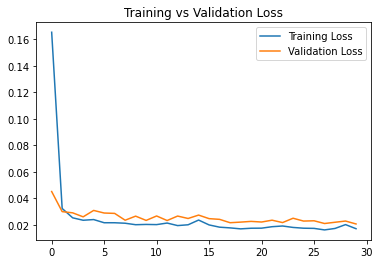

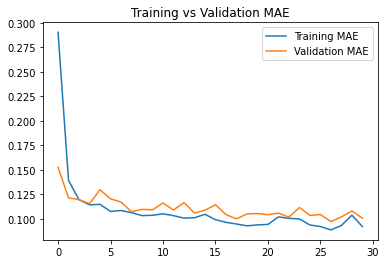

<Figure size 432x288 with 0 Axes>

In [40]:
#Visualize the result of model training

import matplotlib.pyplot as plt

training_loss = history.history['loss']
val_loss = history.history['val_loss']
training_acc = history.history['mae']
val_acc = history.history['val_mae']
epochs_x_axis = history.epoch

plt.plot(epochs_x_axis , training_loss, label='Training Loss')
plt.plot(epochs_x_axis, val_loss, label='Validation Loss')
plt.title("Training vs Validation Loss") 
plt.legend()
plt.figure()

plt.plot(epochs_x_axis, training_acc, label='Training MAE')
plt.plot(epochs_x_axis, val_acc, label='Validation MAE')
plt.title('Training vs Validation MAE')
plt.legend()
plt.figure()

plt.show()

In [41]:
#Make prediction
predictions = model.predict(X_test)
pred_vs_label = np.concatenate((predictions,np.expand_dims(y_test, axis=1)),axis=1)
pred_vs_label = pd.DataFrame(data=pred_vs_label, columns=['prediction', 'labels'])
print(pred_vs_label)

     prediction    labels
0      0.658045  0.734646
1      0.689249  0.664875
2      0.839826  0.850569
3      0.748588  0.800031
4      0.738876  0.800077
..          ...       ...
235    0.649724  0.700614
236    0.699313  0.870581
237    0.724883  0.283958
238    0.723781  0.861875
239    0.776017  0.906667

[240 rows x 2 columns]


In [43]:
#Store the prediction data on drive
csv_file_prediction = "/content/gdrive/MyDrive/Colab Notebooks/prediction.csv"
export_csv = pred_vs_label.to_csv (csv_file_prediction, index = None, header=True)